# Sub-Seasonal Temperature Forecasting in the United States.

##### Authors:<ul> <li>Fridah Kimathi </li>  <li>Scholar Chapkirui </li></ul>

## Background

## Extra
to accurately predict the average maximum and minimum temperature over a 14-day period for various locations. This information is critical for various industries such as agriculture, energy, transportation, and tourism, as they heavily rely on weather conditions and patterns to make informed decisions and plan their operations accordingly. Improper weather forecasting can lead to significant financial losses, disrupted supply chains, and decreased consumer satisfaction. Hence, there is a strong need for a reliable and efficient method of forecasting sub-seasonal temperatures, which can provide actionable insights for businesses and help them make data-driven decisions.

Extreme weather events are sweeping the globe and range from heat waves, wildfires and drought to hurricanes, extreme rainfall and flooding. These weather events have multiple impacts on agriculture, energy, transportation, as well as low resource communities and disaster planning in countries across the globe.

Accurate long-term forecasts of temperature and precipitation are crucial to help people prepare and adapt to these extreme weather events. Currently, purely physics-based models dominate short-term weather forecasting. But these models have a limited forecast horizon. The availability of meteorological data offers an opportunity for data scientists to improve sub-seasonal forecasts by blending physics-based forecasts with machine learning. Sub-seasonal forecasts for weather and climate conditions (lead-times ranging from 15 to more than 45 days) would help communities and industries adapt to the challenges brought on by climate change.

## Project overview

This project focuses on a prediction task involving forecasting sub-seasonal temperatures (temperatures over a two-week period) within the United States. The dataset used consists of weather and climate information for a number of US locations, for a number of start dates for the two-week observation, as well as the forecasted temperature and precipitation from a number of weather forecast models. Each row in the data corresponds to a single location and a single start date for the two-week period. The task is to predict the arithmetic mean of the maximum and minimum temperature over the next 14 days, for each location and start date.

### **Importing the required libraries**

In [1]:
# importing pandas for data wrangling and manipulation
import pandas as pd

# numpy for numerical operation and arrays
import numpy as np

# importing matplotlib and seaborn for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
%config inlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_context('notebook')


# Sklearn
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, FunctionTransformer, FunctionTransformer
from sklearn.linear_model import LinearRegression, LassoCV, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate, KFold
from sklearn.feature_selection import RFE



import statsmodels.api as sm
import scipy.stats as stats
from statsmodels.formula.api import ols

#### **Loading the data**

In [2]:
#load the train dataset
train_df = pd.read_csv('Data/train_data.csv', index_col=0)
train_df.head(2)

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.833333,9/1/14,237.0,29.02,31.64,29.57,30.73,29.71,31.52,...,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,0.0,0.833333,9/2/14,228.9,29.02,31.64,29.57,30.73,29.71,31.52,...,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42


In [3]:
#load the test dataset
test_df = pd.read_csv('Data/test_data.csv', index_col=0)
test_df.head(2)

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
index,,,,,,,,,,,,,,,,,,,,,
375734,0.0,0.833333,11/1/22,339.88,30.88,30.92,29.17,31.02,29.47,30.93,...,-19.28,-39.77,-29.25,40.88,-8.31,14.91,-24.62,31.05,-23.69,6.27
375735,0.0,0.833333,11/2/22,334.63,30.88,30.92,29.17,31.02,29.47,30.93,...,-19.58,-43.14,-28.62,45.37,-5.42,16.97,-23.94,28.84,-20.61,14.16


# **Data Understanding**

There are two datasets used in the project:
- train_data.csv: the training dataset, where contest-tmp2m-14d__tmp2m, the arithmetic mean of the max and min observed temperature over the next 14 days for each location and start date, is provided
- test_data.csv: the test dataset, where the true value of contest-tmp2m-14d__tmp2m for each row is not provided.

In [4]:
# number of rows and columns
print(f'Shape of train data: {train_df.shape}')
print(f'Shape of test data: {test_df.shape}')

Shape of train data: (375734, 245)
Shape of test data: (31354, 244)


In [5]:
# summary of train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375734 entries, 0 to 375733
Columns: 245 entries, lat to wind-vwnd-925-2010-20
dtypes: float64(240), int64(3), object(2)
memory usage: 705.2+ MB


In [6]:
# summary of test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31354 entries, 375734 to 407087
Columns: 244 entries, lat to wind-vwnd-925-2010-20
dtypes: float64(241), int64(1), object(2)
memory usage: 58.6+ MB


In [7]:
#column names of train_df
train_df.columns

Index(['lat', 'lon', 'startdate', 'contest-pevpr-sfc-gauss-14d__pevpr',
       'nmme0-tmp2m-34w__cancm30', 'nmme0-tmp2m-34w__cancm40',
       'nmme0-tmp2m-34w__ccsm30', 'nmme0-tmp2m-34w__ccsm40',
       'nmme0-tmp2m-34w__cfsv20', 'nmme0-tmp2m-34w__gfdlflora0',
       ...
       'wind-vwnd-925-2010-11', 'wind-vwnd-925-2010-12',
       'wind-vwnd-925-2010-13', 'wind-vwnd-925-2010-14',
       'wind-vwnd-925-2010-15', 'wind-vwnd-925-2010-16',
       'wind-vwnd-925-2010-17', 'wind-vwnd-925-2010-18',
       'wind-vwnd-925-2010-19', 'wind-vwnd-925-2010-20'],
      dtype='object', length=245)

In [8]:
# Printing out the target column name:

for col in train_df.columns:
    if col not in test_df.columns:
        print(f'{col}, Datatype: {train_df[col].dtype}')

contest-tmp2m-14d__tmp2m, Datatype: float64


In [9]:
# columns of dtype object
train_df.select_dtypes(include='object').head(2)

,startdate,climateregions__climateregion
index,,
0,9/1/14,BSh
1,9/2/14,BSh


In [10]:
# unique values of columns with dtype int64

for col in train_df.select_dtypes(include='int64').columns:
    print(train_df[col].value_counts())
    print('*****************************************************')

4    59110
3    50372
7    49344
1    47802
6    46260
2    43690
8    41120
5    38036
Name: mjo1d__phase, dtype: int64
*****************************************************
67    94062
66    78128
48    30326
37    22102
64    15934
63    15934
53    15934
47    15934
44    15934
61    15420
60    15420
51    15420
49    15420
56     9766
Name: mei__meirank, dtype: int64
*****************************************************
4    291438
3     84296
Name: mei__nip, dtype: int64
*****************************************************


The target variable is the the arithmetic mean of the max and min observed temperature over the next 14 days for each location, and start date: 'contest-tmp2m-14d__tmp2m'.

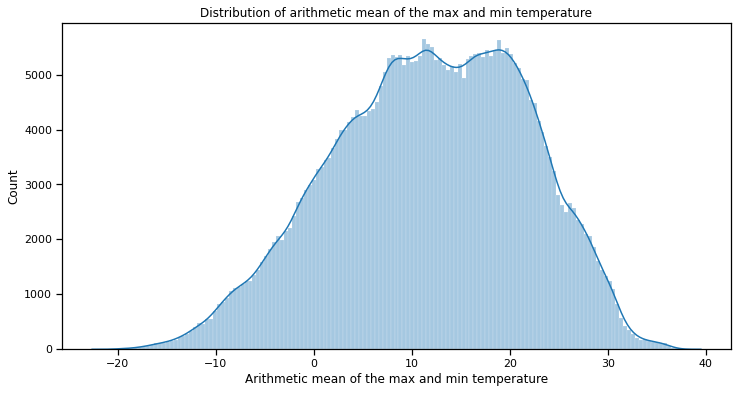

In [11]:
# Distribution of target variable - 'contest-tmp2m-14d__tmp2m'
fig, ax = plt.subplots(figsize=(12,6))
sns.histplot(train_df['contest-tmp2m-14d__tmp2m'], kde=True, kde_kws=dict(cut=3),
             alpha=.4, edgecolor=(1, 1, 1, .4), ax=ax)
ax.set_title('Distribution of arithmetic mean of the max and min temperature')
ax.set_xlabel('Arithmetic mean of the max and min temperature');

The arithmetic mean temperature is between -20 and 40. The temperature is more normally distributed. It is slightly skewed to the left.

## Data Preparation

### Duplicates

In [12]:
# check for duplicates
train_df.duplicated().sum()

0

No duplicates in the dataset.

### Missing values

In [13]:
def is_missing(data):
    """ 
    A function that return columns with missing values
    """
    return {column:data[column].isnull().sum() for column in data.columns if data[column].isnull().sum()}

In [14]:
is_missing(train_df)

{'nmme0-tmp2m-34w__ccsm30': 15934,
 'nmme-tmp2m-56w__ccsm3': 10280,
 'nmme-prate-34w__ccsm3': 8738,
 'nmme0-prate-56w__ccsm30': 15934,
 'nmme0-prate-34w__ccsm30': 15934,
 'nmme-prate-56w__ccsm3': 10280,
 'nmme-tmp2m-34w__ccsm3': 8738,
 'ccsm30': 15934}

In [15]:
train_df[is_missing(train_df).keys()].dtypes

nmme0-tmp2m-34w__ccsm30    float64
nmme-tmp2m-56w__ccsm3      float64
nmme-prate-34w__ccsm3      float64
nmme0-prate-56w__ccsm30    float64
nmme0-prate-34w__ccsm30    float64
nmme-prate-56w__ccsm3      float64
nmme-tmp2m-34w__ccsm3      float64
ccsm30                     float64
dtype: object

In [16]:
# The percentage of missing values per column
perc_missing = {col: round((val/train_df.shape[0])*100, 2) for col, val in is_missing(train_df).items()}
perc_missing

{'nmme0-tmp2m-34w__ccsm30': 4.24,
 'nmme-tmp2m-56w__ccsm3': 2.74,
 'nmme-prate-34w__ccsm3': 2.33,
 'nmme0-prate-56w__ccsm30': 4.24,
 'nmme0-prate-34w__ccsm30': 4.24,
 'nmme-prate-56w__ccsm3': 2.74,
 'nmme-tmp2m-34w__ccsm3': 2.33,
 'ccsm30': 4.24}

In [17]:
# The total percentage of missing values
(sum(is_missing(train_df).values())/train_df.shape[0])*100

# 27% of the data is not that high, rows with missing values to avoid giving false data to the model

27.086183310533517

The missing values can be replaced with the mean. The records with missing values can't be dropped because it constitutes around half of the whole dataset.

In [18]:
def drop_missing(data):
 
   return data.dropna(axis=0)

In [19]:
#columns_missing=  [column for column in train_df.columns if train_df[column].isnull().sum()]
#del_missing = ColumnTransformer(transformers=[('delete_missing', FunctionTransformer(drop_missing), columns_missing)], remainder='passthrough')

In [20]:
train_df = drop_missing(train_df)

In [21]:
#re-check for missing values
is_missing(train_df)

{}

In [22]:
is_missing(test_df)

{}

#### **Feature Engineering**
### Add new features - 'startdate' column

Convert startdate from dtype object to datetime, and add new features “year”, “month” and “day”

In [23]:
def create_time_features(df):
    df['startdate'] = pd.to_datetime(df['startdate'])
    df = df.copy()
    df['year'] = df.startdate.dt.year
    df['month'] = df.startdate.dt.month
    df['dayofyear'] = train_df.startdate.dt.day
    return df

train_df = create_time_features(train_df)
test_df = create_time_features(test_df)
train_df.head(2)

,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,year,month,dayofyear
index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.833333,2014-09-01,237.0,29.02,31.64,29.57,30.73,29.71,31.52,...,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58,2014,9,1
1,0.0,0.833333,2014-09-02,228.9,29.02,31.64,29.57,30.73,29.71,31.52,...,21.17,4.44,48.60,27.41,-23.77,15.44,3.42,2014,9,2


### Separate predictor and target variables

In [24]:
####!!!
train_df['year'].value_counts()

2015    164480
2016    125416
2014     62708
Name: year, dtype: int64

In [25]:
#drop irrelevant column
### Why did you drop year?? Why create it only to drop it?

train_df.drop(['startdate', 'year'],axis=1,inplace=True)
X_test = test_df.drop(['startdate', 'year'], axis=1)

In [26]:
#Obtain the target and features from the training set
# Drop prematurely, why not check for collinearity with the target too before dropping?

#y_train = train_df['contest-tmp2m-14d__tmp2m']
#X_train = train_df.drop(columns='contest-tmp2m-14d__tmp2m')

### Multicollinearity of features

In [58]:
df = train_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

In [59]:
df.columns = ['Column1', 'Column2', 'correlation']
df = df[(df['correlation'] > 0.75) & (df['correlation'] != 1)]
df['pairs'] = set(zip(df['Column1'], df['Column2']))
df.drop(['Column1', 'Column2'], axis=1, inplace=True)

In [66]:
df

,correlation,pairs
19623,0.998910,"(wind-uwnd-250-2010-3, wind-hgt-100-2010-2)"
5715,0.998910,"(ccsm40, nmme-tmp2m-56w__ccsm3)"
1969,0.998893,"(nmme-tmp2m-56w__cancm4, cfsv20)"
2213,0.998893,"(nmme-tmp2m-56w__ccsm4, cancm40)"
22633,0.998837,"(nmme-tmp2m-56w__ccsm3, wind-uwnd-250-2010-1)"
...,...,...
13537,0.750818,"(nmme0-tmp2m-34w__ccsm40, nasa0)"
7160,0.750668,"(wind-hgt-10-2010-1, nmme-tmp2m-56w__gfdlflora)"
13504,0.750668,"(nmme-tmp2m-34w__ccsm4, wind-uwnd-925-2010-1)"
8148,0.750394,"(nmme-tmp2m-34w__gfdlflorb, nmme0mean)"


In [71]:
to_drop = set()
for cols in df['pairs']:
    if cols[0] not in to_drop and cols[1] not in to_drop:
        to_drop.add(cols[0])
    elif cols[0] in to_drop or cols[1] in to_drop:
        pass
to_drop = list(to_drop)

In [73]:
train_df.drop(to_drop, axis=1, inplace=True)

In [75]:
len(train_df.corr() > 0.75)

144

In [ ]:
# We should drop one of the columns in the dataset. Collinearity mostly means the two columns might be indirectly representing the same thing.


###NOT SURE HOW TO HANDLE THE MULTICOLLINEARITY - TOO MANY PAIRS
# LOG TRANSFORM NOT DONE - COZ OF 0 AND NEGATIVE VALUES

 Splitting the train_values and train_labels into train and test data**

### Feature scaling

In [ ]:
# Shouldn't Scaling be done after ohe?


# feature scaling
scaler = StandardScaler()
scale_columns_train = X_train.select_dtypes(include='number').columns
scale_columns_test = X_test.select_dtypes(include='number').columns

# Transform the training and test sets
scaled_train_data = pd.DataFrame(scaler.fit_transform(X_train[scale_columns_train]), columns=scale_columns_train, index=X_train.index)
X_train_processed = pd.concat([X_train.drop(scale_columns_train, axis=1), scaled_train_data], axis=1)

scaled_test_data = pd.DataFrame(scaler.transform(X_test[scale_columns_test]), columns=scale_columns_test, index=X_test.index)
X_test_processed = pd.concat([X_test.drop(scale_columns_test, axis=1), scaled_test_data], axis=1)

In [ ]:
# preview of the processed X-train data
X_train_processed.head(3)

,climateregions__climateregion,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,month,dayofyear
0,BSh,-2.354642,1.159198,-0.200642,1.663408,1.707969,1.924361,1.805495,2.018001,1.847282,...,0.039505,-0.383256,0.490428,1.696985,1.268815,-1.141869,0.056244,-0.267443,0.718982,0.578406
1,BSh,-2.354642,1.159198,-0.241533,1.663408,1.707969,1.924361,1.805495,2.018001,1.847282,...,0.051206,0.075846,0.692953,1.710742,1.243677,-1.539201,0.197446,-0.313633,0.718982,0.587901
2,BSh,-2.354642,1.159198,-0.282980,1.663408,1.707969,1.924361,1.805495,2.018001,1.847282,...,0.004923,0.510431,0.710795,1.708693,0.940538,-1.902486,0.184283,-0.257886,0.718982,0.597396


In [ ]:
# preview of the processed X-test data
X_test_processed.head(3)

,climateregions__climateregion,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,...,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20,month,dayofyear
0,BSh,-2.354642,1.159198,0.318732,1.833234,1.642949,1.884827,1.83292,1.992478,1.79209,...,-0.937384,0.855252,0.293851,0.724634,-0.679775,0.581707,-1.363358,-0.200147,1.298767,0.578406
1,BSh,-2.354642,1.159198,0.292228,1.833234,1.642949,1.884827,1.83292,1.992478,1.79209,...,-0.921003,1.032803,0.384314,0.784931,-0.654637,0.496206,-1.240504,0.114030,1.298767,0.587901
2,BSh,-2.354642,1.159198,0.308383,1.833234,1.642949,1.884827,1.83292,1.992478,1.79209,...,-0.896301,1.206400,0.512966,0.915768,-0.474232,0.419215,-1.087735,0.084564,1.298767,0.597396


### Transform categorical variables

In [ ]:
# unique values of the categorical column
X_train_processed['climateregions__climateregion'].unique()

array(['BSh', 'Cfa', 'BSk', 'BWk', 'BWh', 'Csa', 'Csb', 'Cfb', 'Dfb',
       'Dsc', 'Dfc', 'Dfa', 'Dsb', 'Dwa', 'Dwb'], dtype=object)

In [ ]:
# Creating dummy variables for the categorical column climateregions__climateregion
categorical_col = ['climateregions__climateregion']
X_test_processed = pd.get_dummies(X_test_processed, columns=categorical_col, drop_first=True)
X_train_processed = pd.get_dummies(X_train_processed, columns=categorical_col, drop_first=True)
X_train_processed.head(2)

,lat,lon,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,...,climateregions__climateregion_Cfb,climateregions__climateregion_Csa,climateregions__climateregion_Csb,climateregions__climateregion_Dfa,climateregions__climateregion_Dfb,climateregions__climateregion_Dfc,climateregions__climateregion_Dsb,climateregions__climateregion_Dsc,climateregions__climateregion_Dwa,climateregions__climateregion_Dwb
0,-2.354642,1.159198,-0.200642,1.663408,1.707969,1.924361,1.805495,2.018001,1.847282,1.871016,...,0,0,0,0,0,0,0,0,0,0
1,-2.354642,1.159198,-0.241533,1.663408,1.707969,1.924361,1.805495,2.018001,1.847282,1.871016,...,0,0,0,0,0,0,0,0,0,0


## Modeling

### 1. Baseline model - Linear Regression

In [ ]:
# model using basic linear regression
baseline_model = LinearRegression()
baseline_model.fit(X_train_processed, y_train)

LinearRegression()

In [ ]:
#cross validation
cross_val = cross_validate(baseline_model, X_train_processed, y_train, cv=8, scoring='neg_root_mean_squared_error', return_train_score=True)

# Negative signs in front to convert back to RMSE from -RMSE
train_avg = -cross_val["train_score"].mean()
test_avg = -cross_val["test_score"].mean()
print(f'Cross validation RMSE train error: {train_avg}')
print(f'Cross validation RMSE test error: {test_avg}')

Cross validation RMSE train error: 1.2685389643992555
Cross validation RMSE test error: 1.5059980515315925


In [ ]:
solutions1 = pd.DataFrame()
solutions1['contest-tmp2m-14d__tmp2m'] = baseline_model.predict(X_test_processed)
solutions1['index'] = test_df['index']
solutions1.head(3)

,contest-tmp2m-14d__tmp2m,index
0,28.204863,375734
1,28.038584,375735
2,27.863478,375736


In [ ]:
solutions1.to_csv('Solutions/solutions1.csv', index = False)

Score is 5.291.

### 2. Lasso Regression

In [ ]:
# lasso regression
lasso = LassoCV(max_iter=100000, cv=15)
lasso.fit(X_train_processed, y_train)

print('\n----------------\n')
print('The optimal alpha for the lasso regression is: ', lasso.alpha_)


----------------

The optimal alpha for the lasso regression is:  0.009420555987980219


In [ ]:
solutions2 = pd.DataFrame()
solutions2['contest-tmp2m-14d__tmp2m'] = lasso.predict(X_test_processed)
solutions2['index'] = test_df['index']
solutions2.to_csv('Solutions/solutions2.csv', index = False)
solutions2.head(3)

,contest-tmp2m-14d__tmp2m,index
0,27.187991,375734
1,27.170391,375735
2,27.255788,375736


Score is 1.714. Better than the baseline model